In [2]:
import pandas as pd
import numpy as np
import plotnine as p9

In [3]:
p9.options.dpi=300
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype']='none'

In [ ]:
#sci-RNA-seq
#According to supplement text: "For optimized efficiency, we use 2,000 mammalian cells or 5,000 mammalian nuclei per well for RT reaction"
#So for experiment 1 in Table S1 (384*384) there should be 2000*384=768k cells were the input for the 1st round of barcoding?
#Sorting into wells for second round of barcoding (Table S1): 75% of all wells: 50 cells per well, 12.5% of all wells: 25 cells per well, 12.5% of all wells: 100 cells per well.
#This means a total of 20400 cells went into second round of barcoding. #In the end 15,997 cells were recovered according to Fig 1C. 
#I can't be sure how many cells per well in the first round, and whether most cells after first round were sorted into the second 384-plate. 
#This makes it difficult to estimate cell recovery rate for this experiment.

#For experiment 3 in Table S1 (576*960), based on the main text: 
#"each well containing ~1000 C. elegans cells, along with ~1000 human (HEK293T) cells as internal controls. 
#"After pooling all cells, we sorted the mixture of C. elegans and HEK293T cells into 10 new 96-well plates for PCR barcoding (960 second-round barcodes), gating on DNA content to distinguish between C. elegans and HEK293T cells. 
#"This sorting resulted in 96% of wells harboring only C. elegans cells (140 each) and 4% of wells harboring a mix of C. elegans and HEK293T cells (140 C. elegans and 10 HEK293T each).
#"This experiment yielded 42,035 C. elegans single-cell transcriptomes
#This suggests to me that during the sorting in order to achieve the desired C.elegans-HEK293T ratio, some cells would not go into the plates. Again making it difficult to estimate the true recovery rate.

In [ ]:
#Microwell combinatorial indexing:
#I can't find in the SPLiT-seq publication how many cells went into the first round of barcoding.
#Use the commercial version of SPLiT-seq (Parse Biosciences's Evercode products) to estimate:
#https://support.parsebiosciences.com/hc/en-us/articles/9483723096468-What-is-the-maximum-capacity-for-Parse-Biosciences-Evercode-Whole-Transcriptome-kits
#Based on the info from this website, 

#Parse Biosciences Evercode WT Mini Kit (10,000 cells/nuclei), 
#The input number of cells/nuclei (total across all samples) going into Barcoding Plate #1 will be 50,000. #The maximum number of output barcoded cells/nuclei is 10,000.
#-->20% recovery rate.

#Parse Biosciences WT Kit (100,000 cells/nuclei)
#At full kit capacity, the input number of cells/nuclei (total across all samples) going into Barcoding Plate #1 will be 350,000.
#The maximum number of output barcoded cells/nuclei is 100,000. -->28.6% recovery. 
#This is quite consistent with 

#Parse Biosciences Evercode WT Mega Kit (1M cells/nuclei)
#At full kit capacity, the input number of cells/nuclei (total across all samples) going into Barcoding Plate #1 will be 2.85M.
#The maximum number of output barcoded cells/nuclei is 1M. -->35% recovery

#This publication provides data points within the range
#https://www.mdpi.com/1422-0067/25/7/3828
#Xie et al., Comparative Analysis of Single-Cell RNA Sequencing Methods with and without Sample Multiplexing


In [ ]:
#Paired-seq:
#Fig 1:
#"As a proof of principle, we collected 8.0 million nuclei for barcoding, 
#and after three rounds of ligation, we recovered 1.51 million barcoded nuclei (18.9% recovery rate)"

#Fig2:
#"we applied it to freshly collected adult mouse cerebral cortex. 
#"We used 10 million nuclei as input and recovered approximately 2.51 million barcoded nuclei (25.1% recovery rate)"

#Fig3:
#"We collected a total of 6.0 million nuclei from these two samples and recovered 0.56 million barcoded nuclei (9.3% recovery rate)


In [ ]:
#scifi-RNA-seq:
#Only the recovery rate before and after the first round of barcoding (RT) is reported in the text and Extended Fig 3b:
#"Notably, preindexing inside permeabilized nuclei was only minimally damaging, with nuclei recovery rates of 53.3% (cell lines) and 41.1% (human primary material) before loading the samples on the droplet microfluidics chip"
#To estimate the overall recovery rate, let's assume a perfect recovery before and after the second round of barcoding, which would be 65% based on Chromium ATAC v2.
#Therefore the overall recovery rate would be 65%*[41.1%, 53.3%] --> 26.7% ~ 34.6%

In [ ]:
#OAK:
#Include all experiments in this study:
#Fig1c: 50%-59%
#Fig 1f: 44,528 cells recovered from 100k cells that went into first round of barcoding --> 44.5% recovery
#Fig 1gh:
#MeOH: 65k cells transposed, followed by 2 rounds of barcoding. 34.8k cells recovered. --> 53.5% recovery.
#FA: 75k cells transposed, followed by 2 rounds of barcoding. 37.2k cells recovered. --> 49.6% recovery.
#Fig 2: 100k cells transposed, followed by 2 rounds of barcoding. 40,691 joint profiles achieved. --> 40.7% recovery. 
#Fig 3: 
#For Day 0, 2 channels loaded, each with 138,000 cells. 144,300 cells recovered. --> 52.3% recovery.
#For Day 10, 3 channels were loaded, each with 180,000 cells. 264,000 cells recovered. --> 48.9% recovery.

Text(0.5, 0, 'Cell Recovery (%)')

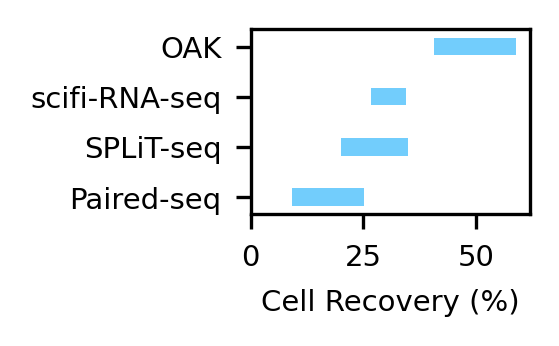

In [6]:
target_bars_start = [9.3, 20, 26.7, 40.7]   
target_bars_end = [25.1, 35, 34.6, 59] 
N = len(target_bars_end)
ind = ['Paired-seq','SPLiT-seq','scifi-RNA-seq','OAK'] 
plt.figure(figsize=(1.2,0.8),dpi=300)
plt.rc('font',size=7)
plt.barh(ind, target_bars_end, 0.35,color='#72CDFC')
plt.barh(ind, target_bars_start, 0.35, color='white')
plt.xlabel('Cell Recovery (%)')

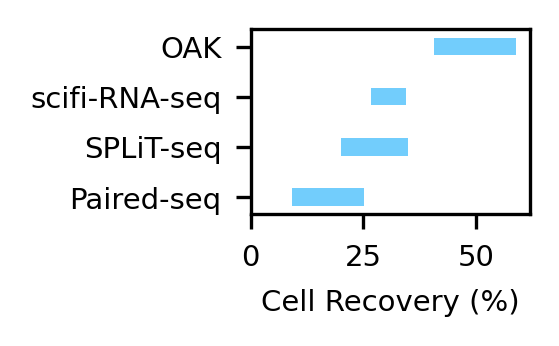

In [9]:
target_bars_start = [9.3, 20, 26.7, 40.7]   
target_bars_end = [25.1, 35, 34.6, 59] 
N = len(target_bars_end)
ind = ['Paired-seq','SPLiT-seq','scifi-RNA-seq','OAK'] 
plt.figure(figsize=(1.2,0.8),dpi=300)
plt.rc('font',size=7)
plt.barh(ind, target_bars_end, 0.35,color='#72CDFC')
plt.barh(ind, target_bars_start, 0.35, color='white')
plt.xlabel('Cell Recovery (%)')
plt.savefig('cell_recovery.svg',format='svg',dpi=300,bbox_inches='tight')  